In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=14, color='grey')
plt.rc('ytick', labelsize=14, color='grey')
plt.rc('axes', titlesize=22)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('legend', fontsize=16)
plt.rc('savefig', dpi=330, bbox='tight')

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
metrics = ['Rewards','Energy','Comfort','Uncomfortable Degree Hour','Critic Loss','Actor Loss']

def read_result(file_name, col_names):
    with open (file_name, "r") as myfile:
        data = myfile.read().splitlines()

    result_dict = {}
    for i in range(len(data)):
        result = [float(element) for element in data[i].split(',')]
        result_dict[int(result[0])] = result[1:]

    result= pd.DataFrame.from_dict(result_dict, orient='index', columns=col_names)

    return result

In [3]:
algorithms = ['ddpg', 'td3', 'sac']

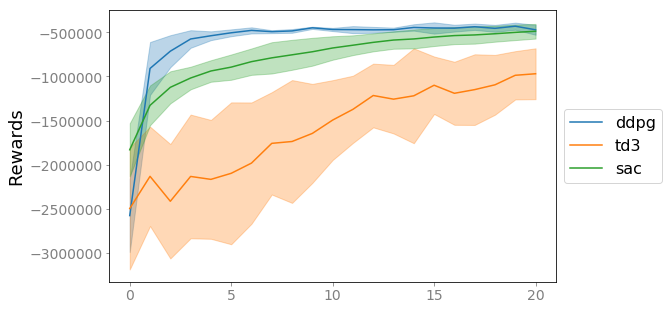

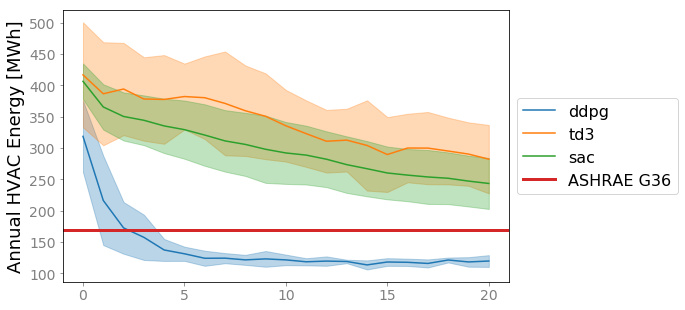

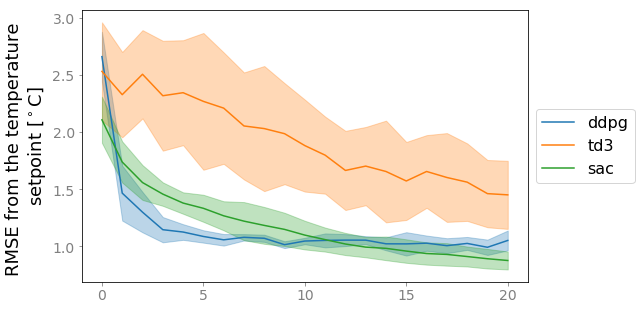

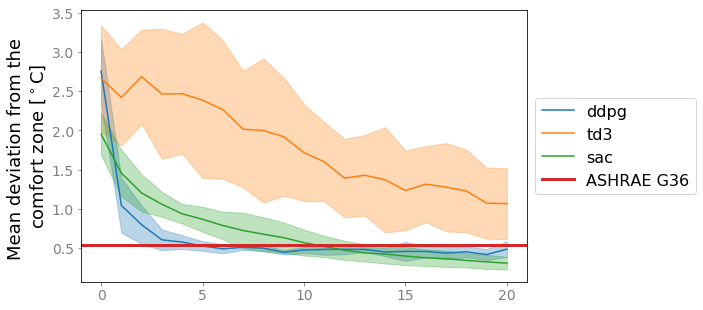

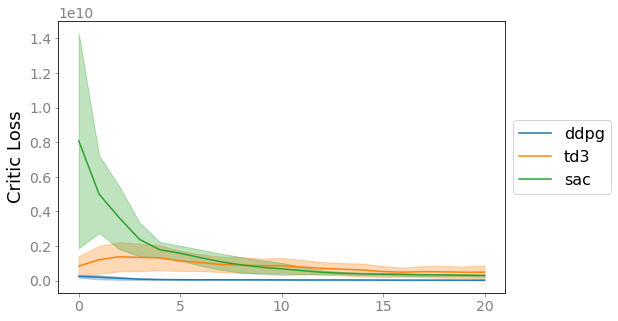

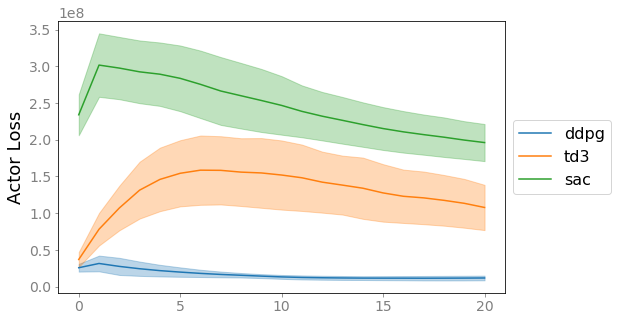

In [31]:
# Plot experiment 1 results

for comp_metrics in metrics:

    fig, axs = plt.subplots(1, 1, sharex=True, figsize=(8,5))
    for algorithm in algorithms:
        color_index = algorithms.index(algorithm)
        result_dict = {}
        for run in range(1,6):
            result = read_result('exp1-officeHour247/'+algorithm+'_run{}.log'.format(run), metrics)[comp_metrics].values
            result_dict[run] = result[:21]
            result_df = pd.DataFrame.from_dict(result_dict)
        
        # Normalize the comfort metrics
        if comp_metrics == 'Comfort':
            result_df = (result_df/(365*24*4*9))**0.5
        elif comp_metrics == 'Uncomfortable Degree Hour':
            result_df = result_df/(365*24*4*9)
        elif comp_metrics == 'Energy':
            result_df = result_df/1000
        
        mean = result_df.mean(axis=1)
        std = result_df.std(axis=1)    
        episode = range(0, len(result_df))

        axs.plot(episode, mean, color=default_colors[color_index],label=algorithm)
        axs.fill_between(episode, mean-std, mean+std, color=default_colors[color_index], alpha=0.3)

    if comp_metrics == 'Comfort':
        axs.set_ylabel("RMSE from the temperature \nsetpoint [$^\circ$C]")
    elif comp_metrics == 'Uncomfortable Degree Hour':
        axs.set_ylabel("Mean deviation from the \ncomfort zone [$^\circ$C]")
        axs.axhline(y=100000/(365*14*4*9), label='ASHRAE G36', 
                    linewidth=3, color=default_colors[color_index+1])
    elif comp_metrics == 'Energy':
        axs.set_ylabel("Annual HVAC Energy [MWh]")
        axs.axhline(y=170, label='ASHRAE G36', 
                    linewidth=3,color=default_colors[color_index+1])
    else:
        axs.set_ylabel(comp_metrics)
    
    axs.legend(loc='center left', bbox_to_anchor=(1,0.5))
    axs.set_xticks([0,5,10,15,20])
    axs.set_xticklabels([0,5,10,15,20])
    
    plt.savefig(f'fig/exp1_{comp_metrics}.png')

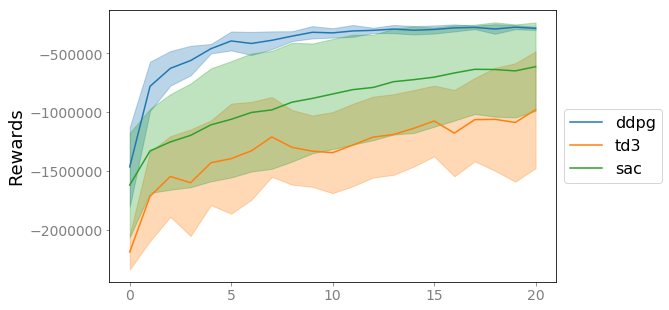

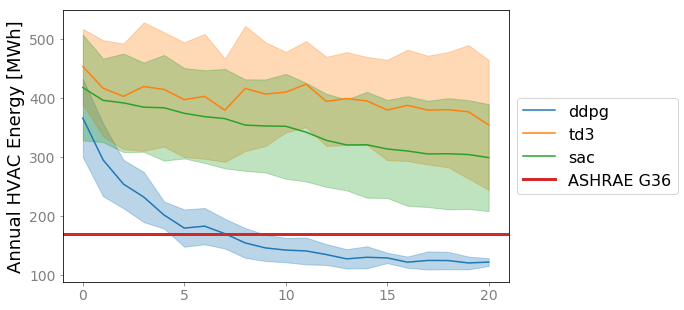

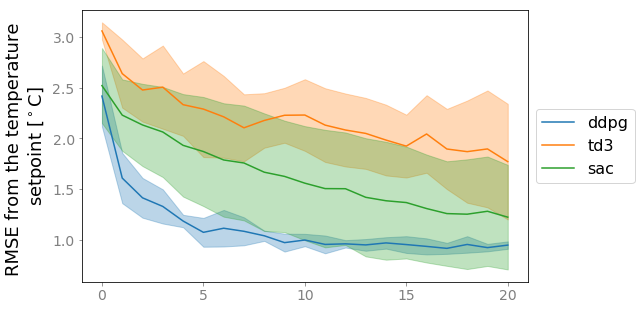

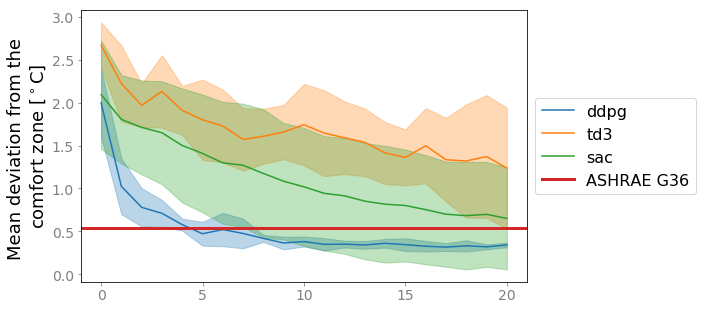

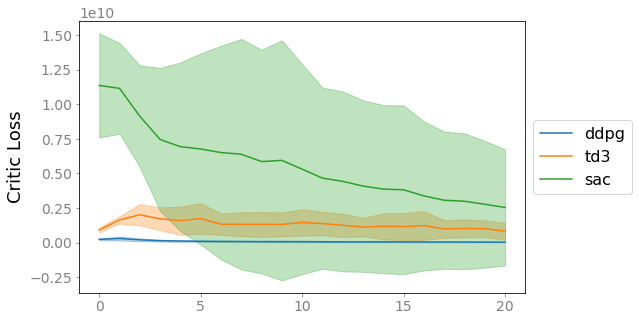

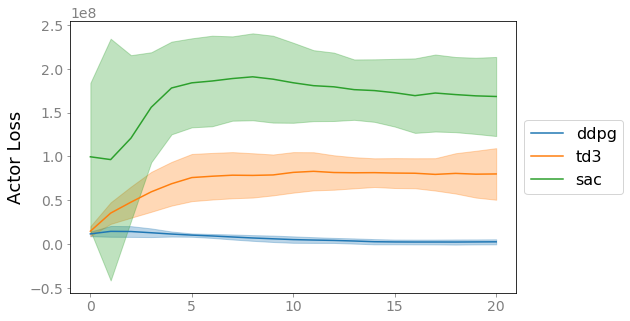

In [30]:
# Plot experiment 1 results

for comp_metrics in metrics:

    fig, axs = plt.subplots(1, 1, sharex=True, figsize=(8,5))
    for algorithm in algorithms:
        color_index = algorithms.index(algorithm)
        result_dict = {}
        for run in range(1,6):
            result = read_result('exp2-officeHourNormal/occ_'+algorithm+'_run{}.log'.format(run), metrics)[comp_metrics].values
            result_dict[run] = result[:21]
            result_df = pd.DataFrame.from_dict(result_dict)
        
        # Normalize the comfort metrics
        if comp_metrics == 'Comfort':
            result_df = (result_df/(365*14*4*9))**0.5
        elif comp_metrics == 'Uncomfortable Degree Hour':
            result_df = result_df/(365*14*4*9)
        elif comp_metrics == 'Energy':
            result_df = result_df/1000
        
        mean = result_df.mean(axis=1)
        std = result_df.std(axis=1)    
        episode = range(0, len(result_df))

        axs.plot(episode, mean, color=default_colors[color_index],label=algorithm)
        axs.fill_between(episode, mean-std, mean+std, color=default_colors[color_index], alpha=0.3)

    if comp_metrics == 'Comfort':
        axs.set_ylabel("RMSE from the temperature \nsetpoint [$^\circ$C]")
    elif comp_metrics == 'Uncomfortable Degree Hour':
        axs.set_ylabel("Mean deviation from the \ncomfort zone [$^\circ$C]")
        axs.axhline(y=100000/(365*14*4*9), label='ASHRAE G36', 
                    linewidth=3, color=default_colors[color_index+1])
    elif comp_metrics == 'Energy':
        axs.set_ylabel("Annual HVAC Energy [MWh]")
        axs.axhline(y=170, label='ASHRAE G36', 
                    linewidth=3,color=default_colors[color_index+1])
    else:
        axs.set_ylabel(comp_metrics)
    
    axs.legend(loc='center left', bbox_to_anchor=(1,0.5))
    axs.set_xticks([0,5,10,15,20])
    axs.set_xticklabels([0,5,10,15,20])
    
    plt.savefig(f'fig/exp2_{comp_metrics}.png')